**BASIC SETUP & DATA UNDERSTANDING**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8")
sns.set_palette("Set2")

df = pd.read_csv("/content/insurance_dataset.csv")

In [2]:
df.shape

(83000, 32)

In [3]:
df.head()

,city,locality_category,locality,occupation_type,annual_income,age,bmi,smoker,chronic_disease_count,policy_type,...,urban_flood_risk,road_condition_index,drainage_quality_index,green_cover_percent,industrial_exposure_index,traffic_density_index,respiratory_disease_rate,waterborne_disease_rate,vector_borne_disease_rate,annual_premium
0,Chennai,Commercial Area,OMR,Government_PSU,1.598085e+06,36,29.473800,0,0,Basic,...,Low,1,3,35.592645,1,4,0.342127,0.073537,0.054464,41664.23
1,Kolkata,Low-Income,Garden Reach,Business_Entrepreneur,4.623861e+06,68,24.443690,0,0,Standard,...,Low,4,2,26.257794,5,2,0.220310,0.027202,0.257417,48056.02
2,Chennai,Middle-Income,Tambaram,Manufacturing_Worker,6.510533e+05,32,25.296795,0,0,Basic,...,High,1,4,19.674409,2,3,0.262057,0.187672,0.238243,20051.43
3,Hyderabad,Middle-Income,Uppal,Finance_Banking,1.027523e+06,65,28.398588,0,1,Standard,...,Low,3,1,20.717799,3,5,0.124788,0.114388,0.233999,34605.60
4,Chennai,Commercial Area,OMR,Government_PSU,1.835796e+06,59,25.443694,1,2,Standard,...,Low,3,2,21.880759,2,1,0.171151,0.034925,0.098557,40390.59


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83000 entries, 0 to 82999
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   city                       83000 non-null  object 
 1   locality_category          83000 non-null  object 
 2   locality                   83000 non-null  object 
 3   occupation_type            83000 non-null  object 
 4   annual_income              83000 non-null  float64
 5   age                        83000 non-null  int64  
 6   bmi                        83000 non-null  float64
 7   smoker                     83000 non-null  int64  
 8   chronic_disease_count      83000 non-null  int64  
 9   policy_type                83000 non-null  object 
 10  sum_insured                83000 non-null  int64  
 11  previous_claims            83000 non-null  int64  
 12  credit_score               83000 non-null  int64  
 13  aqi                        83000 non-null  int

**MISSING VALUES & DATA QUALITY**

In [5]:
df.isnull().sum().sort_values(ascending=False)


,0
city,0
locality_category,0
locality,0
occupation_type,0
annual_income,0
age,0
bmi,0
smoker,0
chronic_disease_count,0
policy_type,0


In [6]:
(df.isnull().mean() * 100).round(2)


,0
city,0.0
locality_category,0.0
locality,0.0
occupation_type,0.0
annual_income,0.0
age,0.0
bmi,0.0
smoker,0.0
chronic_disease_count,0.0
policy_type,0.0


**TARGET VARIABLE ANALYSIS**

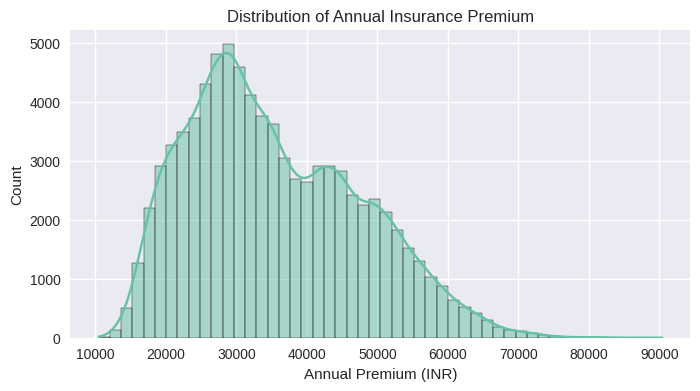

In [7]:
plt.figure(figsize=(8,4))
sns.histplot(df["annual_premium"], kde=True, bins=50)
plt.title("Distribution of Annual Insurance Premium")
plt.xlabel("Annual Premium (INR)")
plt.show()


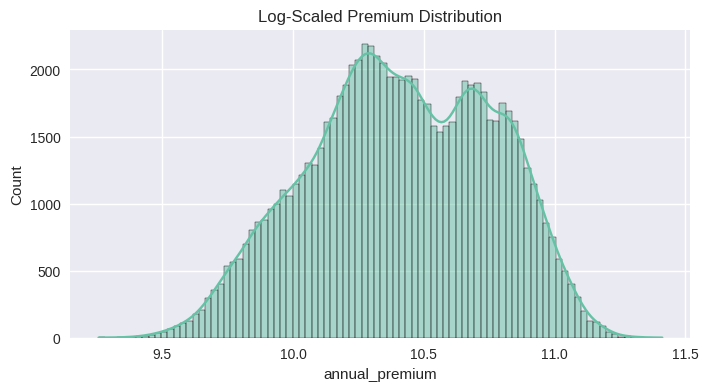

In [8]:
plt.figure(figsize=(8,4))
sns.histplot(np.log1p(df["annual_premium"]), kde=True)
plt.title("Log-Scaled Premium Distribution")
plt.show()


**CITY-WISE & LOCALITY CATEGORY ANALYSIS**

**City vs Premium**

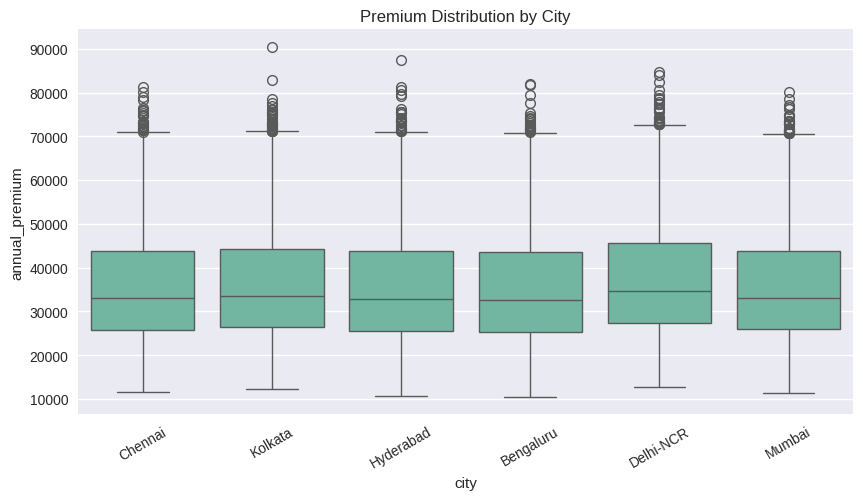

In [9]:
plt.figure(figsize=(10,5))
sns.boxplot(x="city", y="annual_premium", data=df)
plt.xticks(rotation=30)
plt.title("Premium Distribution by City")
plt.show()

**Locality Category vs Premium**

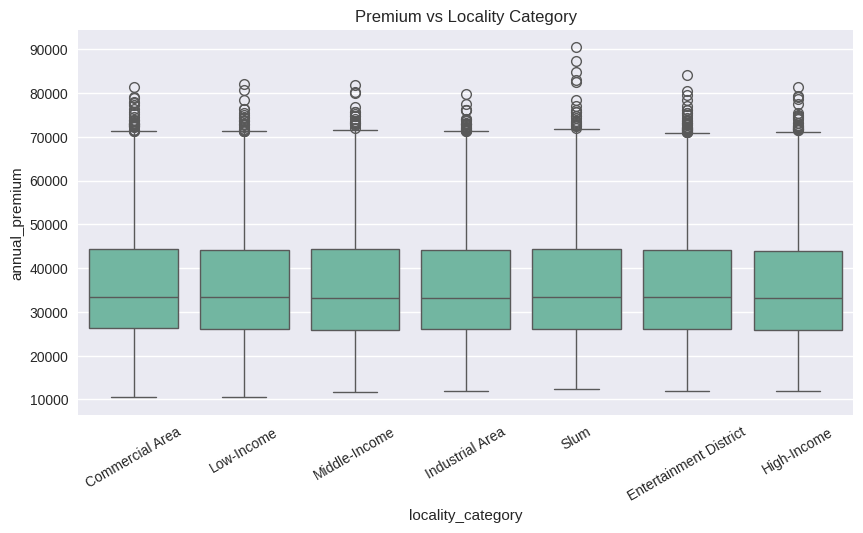

In [10]:
plt.figure(figsize=(10,5))
sns.boxplot(x="locality_category", y="annual_premium", data=df)
plt.xticks(rotation=30)
plt.title("Premium vs Locality Category")
plt.show()


**DEMOGRAPHIC ANALYSIS**

**Age Distribution**

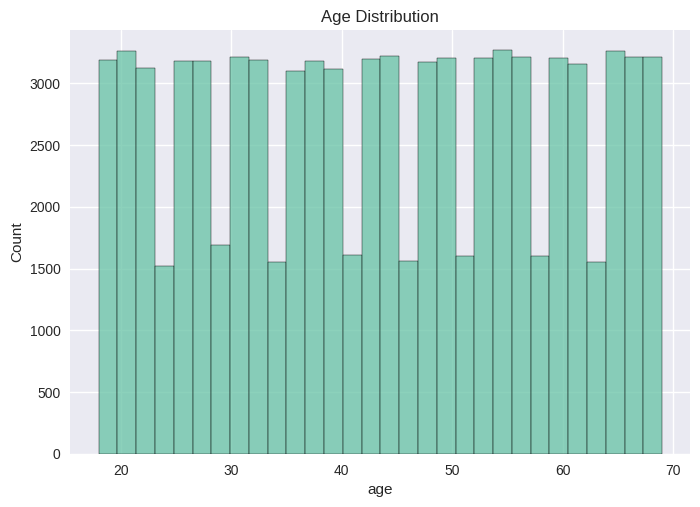

In [11]:
sns.histplot(df["age"], bins=30)
plt.title("Age Distribution")
plt.show()

**Age vs Premium**

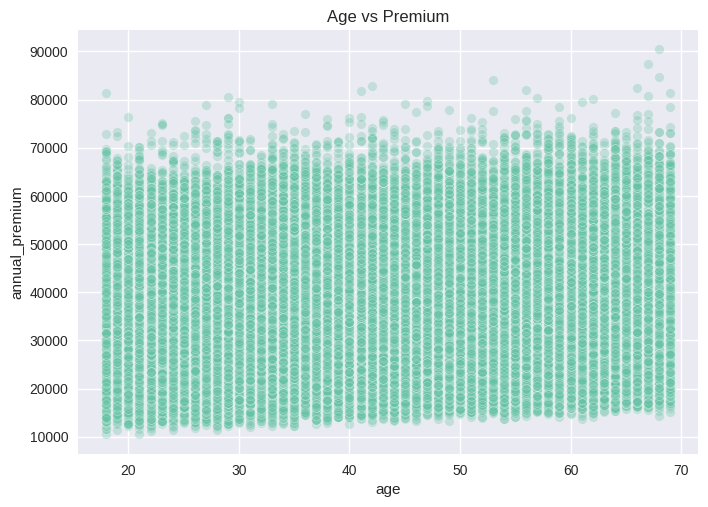

In [12]:
sns.scatterplot(x="age", y="annual_premium", data=df, alpha=0.3)
plt.title("Age vs Premium")
plt.show()


**Income Distribution (Log scale – critical)**

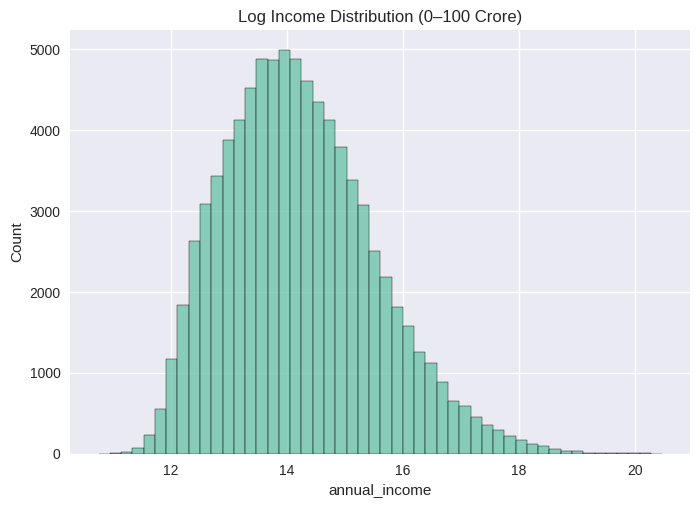

In [13]:
sns.histplot(np.log1p(df["annual_income"]), bins=50)
plt.title("Log Income Distribution (0–100 Crore)")
plt.show()


**Income vs Sum Insured**

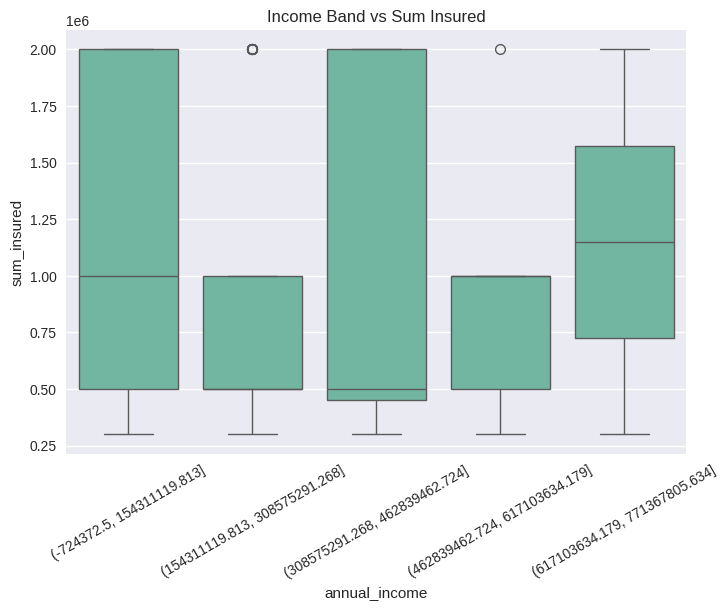

In [14]:
sns.boxplot(
    x=pd.cut(df["annual_income"], bins=5),
    y=df["sum_insured"]
)
plt.xticks(rotation=30)
plt.title("Income Band vs Sum Insured")
plt.show()


**PROFESSION & POLICY ANALYSIS**

**Profession-wise Premium**

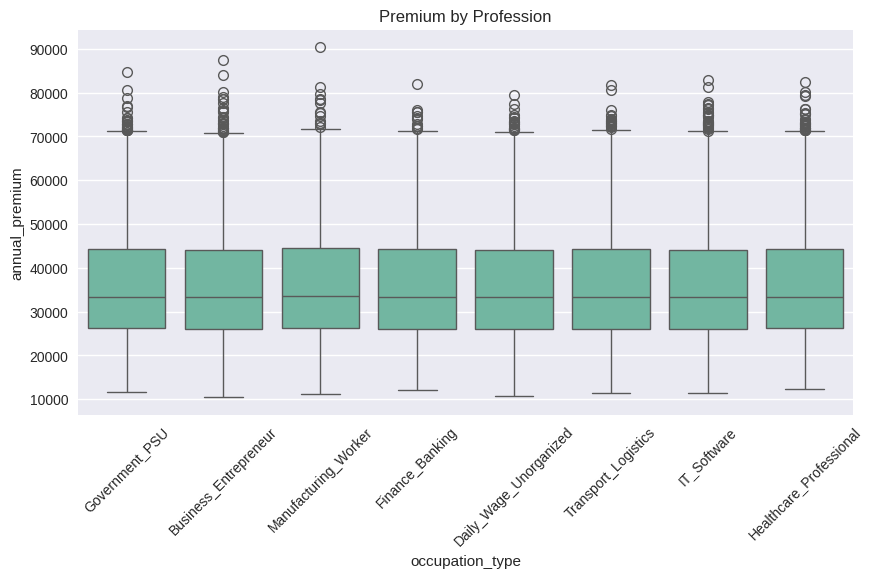

In [15]:
plt.figure(figsize=(10,5))
sns.boxplot(x="occupation_type", y="annual_premium", data=df)
plt.xticks(rotation=45)
plt.title("Premium by Profession")
plt.show()


**Policy Type vs Premium**

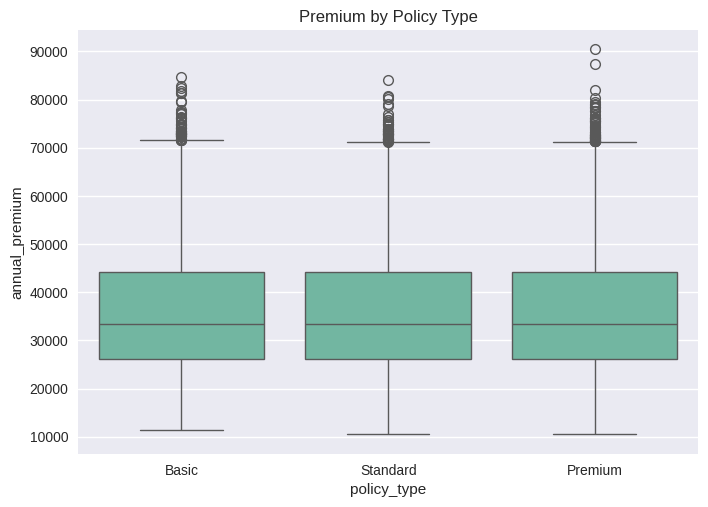

In [16]:
sns.boxplot(x="policy_type", y="annual_premium", data=df)
plt.title("Premium by Policy Type")
plt.show()


**HEALTH & LIFESTYLE FACTORS**

**Smoker vs Non-Smoker**

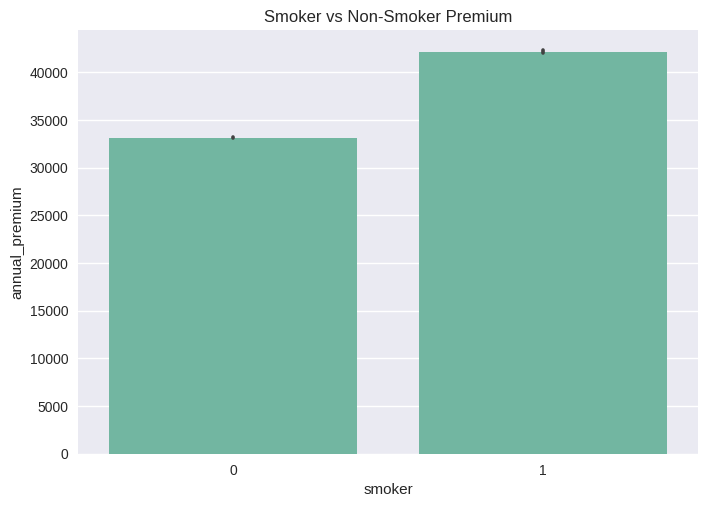

In [17]:
sns.barplot(x="smoker", y="annual_premium", data=df)
plt.title("Smoker vs Non-Smoker Premium")
plt.show()


**BMI vs Premium**

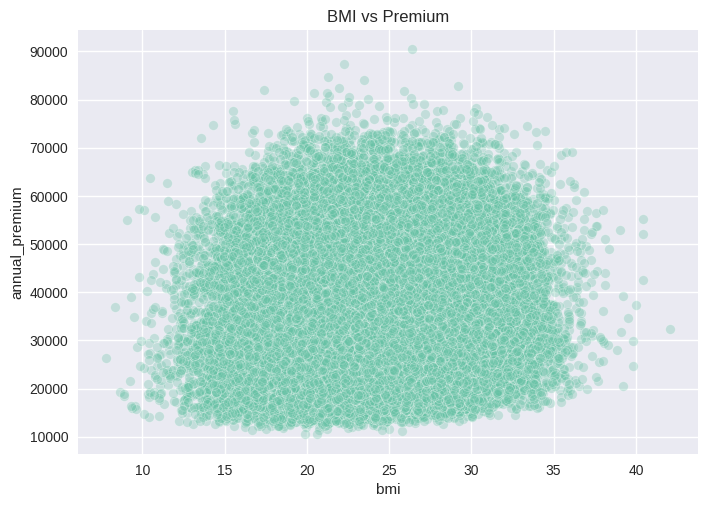

In [18]:
sns.scatterplot(x="bmi", y="annual_premium", data=df, alpha=0.3)
plt.title("BMI vs Premium")
plt.show()


**Chronic Diseases**

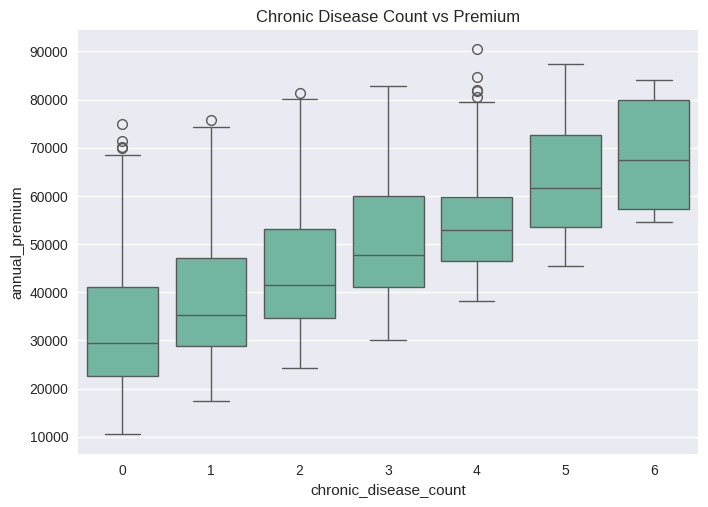

In [19]:
sns.boxplot(x="chronic_disease_count", y="annual_premium", data=df)
plt.title("Chronic Disease Count vs Premium")
plt.show()


**ENVIRONMENTAL & CLIMATE RISK ANALYSIS**

**AQI Distribution by City**

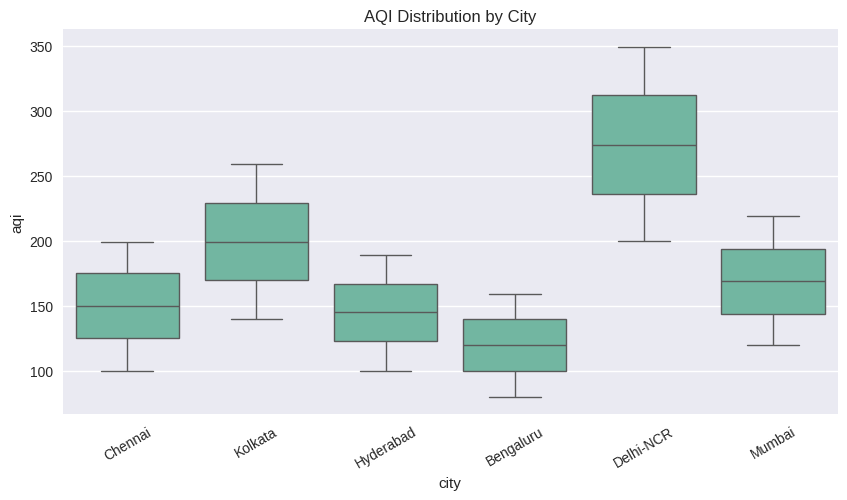

In [20]:
plt.figure(figsize=(10,5))
sns.boxplot(x="city", y="aqi", data=df)
plt.xticks(rotation=30)
plt.title("AQI Distribution by City")
plt.show()


**AQI vs Premium**

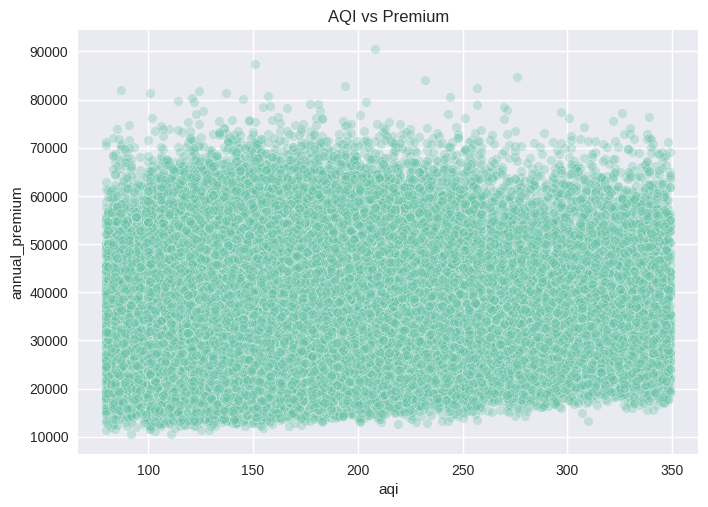

In [21]:
sns.scatterplot(x="aqi", y="annual_premium", data=df, alpha=0.3)
plt.title("AQI vs Premium")
plt.show()


**Flood Risk Impact**

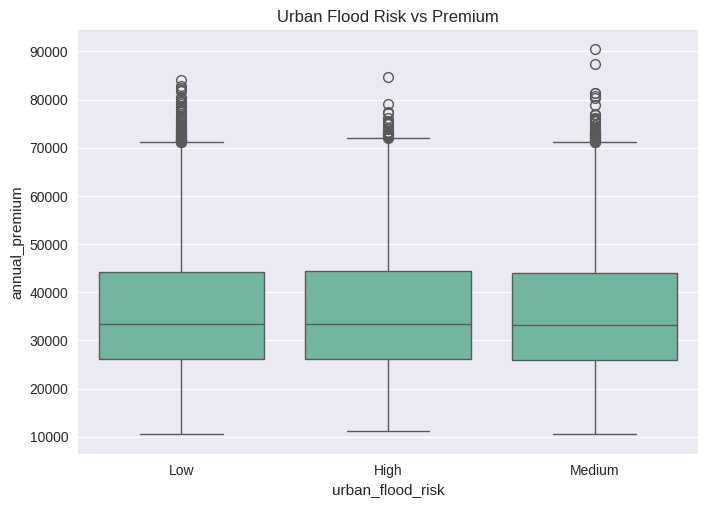

In [22]:
sns.boxplot(x="urban_flood_risk", y="annual_premium", data=df)
plt.title("Urban Flood Risk vs Premium")
plt.show()


**Green Cover Effect**

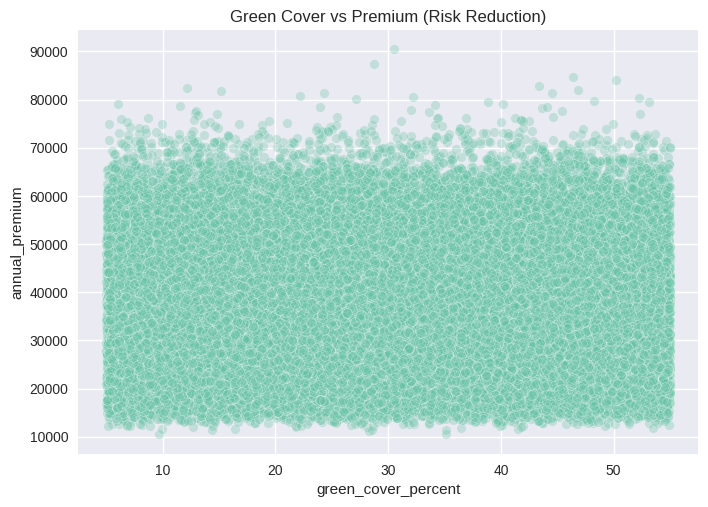

In [23]:
sns.scatterplot(x="green_cover_percent", y="annual_premium", data=df, alpha=0.3)
plt.title("Green Cover vs Premium (Risk Reduction)")
plt.show()


**DISEASE PREVALENCE ANALYSIS**

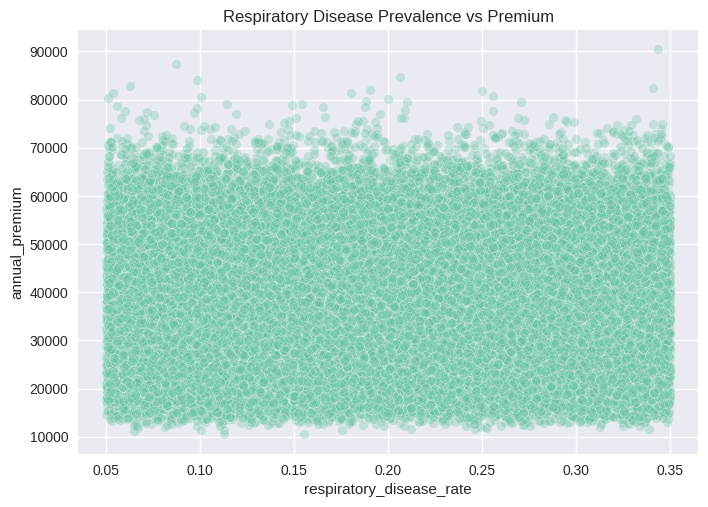

In [24]:
sns.scatterplot(
    x="respiratory_disease_rate",
    y="annual_premium",
    data=df,
    alpha=0.3
)
plt.title("Respiratory Disease Prevalence vs Premium")
plt.show()


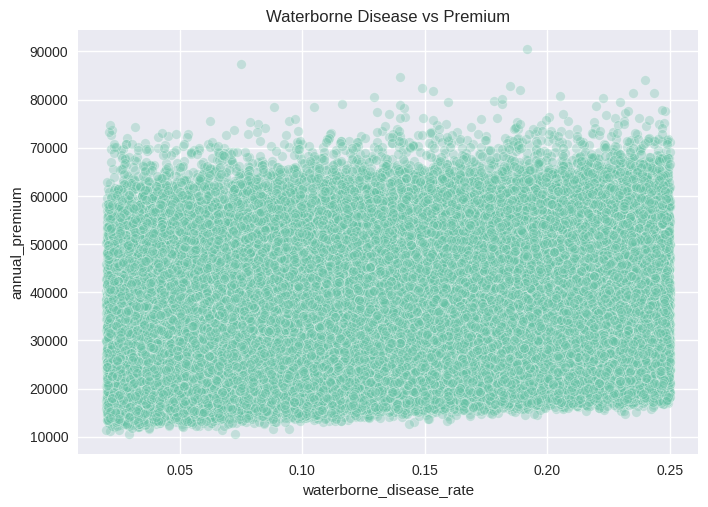

In [25]:
sns.scatterplot(
    x="waterborne_disease_rate",
    y="annual_premium",
    data=df,
    alpha=0.3
)
plt.title("Waterborne Disease vs Premium")
plt.show()


**CORRELATION ANALYSIS (NUMERICAL)**

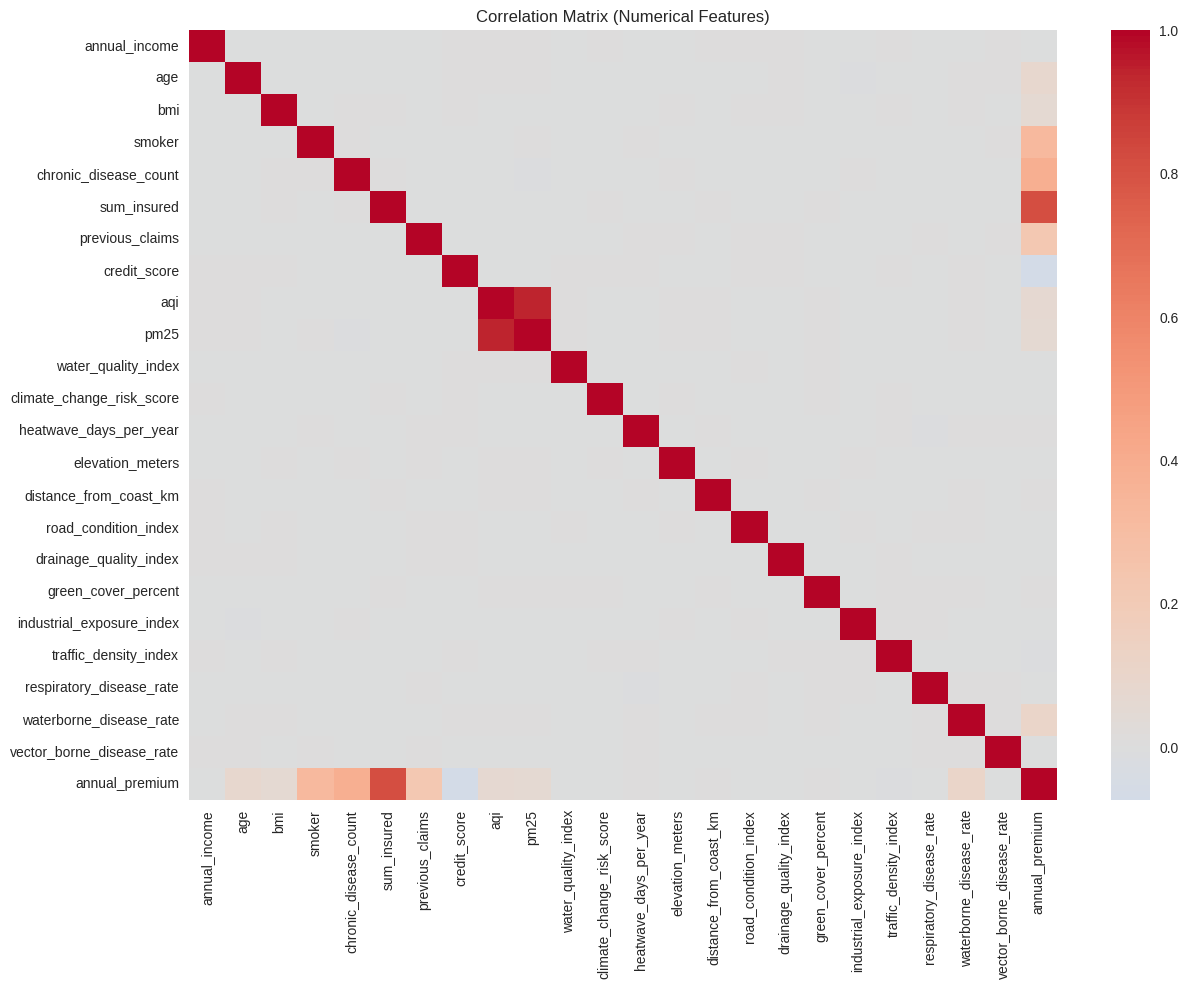

In [26]:
plt.figure(figsize=(14,10))
corr = df.select_dtypes("number").corr()
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Correlation Matrix (Numerical Features)")
plt.show()


**OUTLIER CHECK**

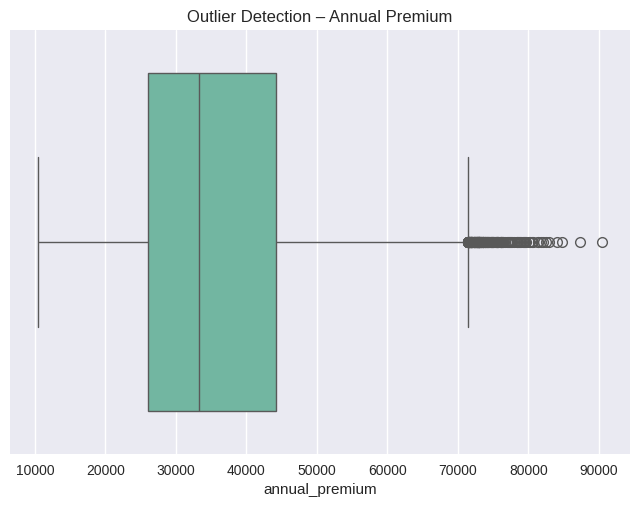

In [27]:
sns.boxplot(x=df["annual_premium"])
plt.title("Outlier Detection – Annual Premium")
plt.show()


In [28]:
df["annual_premium"].quantile([0.95, 0.99, 0.999])


,annual_premium
0.950,57158.58200
0.990,65119.23300
0.999,73487.00243
